In [9]:
import os
import glob

In [8]:
os.path.join('E:/s', 'abd', 'abc', 'd')

'E:/s\\abd\\abc\\d'

In [25]:
os.listdir("E:\\Download\\IEMOCAP_full_release_withoutVideos\\IEMOCAP_full_release\\Session1\\sentences\\wav\\Ses01F_impro01\\")

['Ses01F_impro01_F000.wav',
 'Ses01F_impro01_F001.wav',
 'Ses01F_impro01_F002.wav',
 'Ses01F_impro01_F003.wav',
 'Ses01F_impro01_F004.wav',
 'Ses01F_impro01_F005.wav',
 'Ses01F_impro01_F006.wav',
 'Ses01F_impro01_F007.wav',
 'Ses01F_impro01_F008.wav',
 'Ses01F_impro01_F009.wav',
 'Ses01F_impro01_F010.wav',
 'Ses01F_impro01_F011.wav',
 'Ses01F_impro01_F012.wav',
 'Ses01F_impro01_F013.wav',
 'Ses01F_impro01_F014.wav',
 'Ses01F_impro01_F015.wav',
 'Ses01F_impro01_M000.wav',
 'Ses01F_impro01_M001.wav',
 'Ses01F_impro01_M002.wav',
 'Ses01F_impro01_M003.wav',
 'Ses01F_impro01_M004.wav',
 'Ses01F_impro01_M005.wav',
 'Ses01F_impro01_M006.wav',
 'Ses01F_impro01_M007.wav',
 'Ses01F_impro01_M008.wav',
 'Ses01F_impro01_M009.wav',
 'Ses01F_impro01_M010.wav',
 'Ses01F_impro01_M011.wav',
 'Ses01F_impro01_M012.wav',
 'Ses01F_impro01_M013.wav']

In [18]:
"asbdiasf.wav"[:-4]

'asbdiasf'

In [19]:
a = []
b = [1, 2, 3]

In [21]:
a + b + b

[1, 2, 3, 1, 2, 3]

In [9]:
from data.mfcc_extraction import IEMOCAP_Dataset

ROOT = "E:\\Download\\IEMOCAP_full_release_withoutVideos\\IEMOCAP_full_release"
iemocap = IEMOCAP_Dataset(root=ROOT)

In [10]:
iemocap.LABELS

array(['ang', 'dis', 'exc', 'fea', 'fru', 'hap', 'neu', 'oth', 'sad',
       'sur', 'xxx'], dtype='<U3')

In [2]:
iemocap.utterance_paths[0]

'E:\\Download\\IEMOCAP_full_release_withoutVideos\\IEMOCAP_full_release\\Session1\\sentences\\wav\\Ses01F_impro01\\Ses01F_impro01_F000.wav'

In [3]:
len(iemocap.utterance_list)

10039

In [3]:
len(iemocap.label_map.items())

10039

In [9]:
import wave
import numpy as np
import python_speech_features as psf

PATH = iemocap.utterance_paths[1]
with wave.open(PATH, 'r') as f:
    nchannels, sampwidth, framerate, wav_length = f.getparams()[:4]
    data = np.frombuffer(f.readframes(wav_length), dtype=np.short)
    print(data)
    time = np.arange(0,wav_length) * (1.0/framerate)
    print(time)

[ 31 -31 -23 ... -15 -11 -42]
[0.0000000e+00 6.2500000e-05 1.2500000e-04 ... 1.3822500e+00 1.3823125e+00
 1.3823750e+00]


In [10]:
mel_spec = psf.logfbank(data, framerate, nfilt=40)
delta1 = psf.delta(mel_spec, 2)
delta2 = psf.delta(delta1, 2)
display(mel_spec.shape)
display(delta1.shape)
display(delta2.shape)

(137, 40)

(137, 40)

(137, 40)

In [19]:
np.stack((mel_spec, delta1, delta2), axis=1).shape

(137, 3, 40)

In [21]:
'Ses01F_impro01_F000'[:5]

'Ses01'

In [1]:
import numpy as np

a = np.random.randint(5, size=(3,3,3))
b = 1

np.array((b, a), dtype=object)

array([1, array([[[2, 2, 4],
                  [0, 2, 1],
                  [0, 3, 0]],

                 [[1, 2, 0],
                  [2, 0, 3],
                  [0, 4, 3]],

                 [[0, 1, 3],
                  [0, 2, 3],
                  [3, 1, 0]]])], dtype=object)

In [2]:
sample = np.load("E:\\Download\\IEMOCAP_full_release_withoutVideos\\data\\train\\Ses01F_impro01_F000.npy", allow_pickle=True)

In [3]:
sample[1].shape

(194, 3, 40)

In [22]:
np.pad(sample[1], ((0, 106), (0, 0), (0, 0))).shape

(300, 3, 40)

In [5]:
import torch
import torch.nn as nn

sample_data = torch.tensor(sample[1])
sample_data.shape

torch.Size([194, 3, 40])

In [20]:
nn.functional.pad(sample_data, (0, 0, 0, 0, 0, 300 - 194)).shape

torch.Size([300, 3, 40])

In [57]:
import pickle

with open("data/IEMOCAP.pkl", "rb") as f:

    data = pickle.load(f)

In [58]:
data[0].shape

(1200, 300, 40, 3)

In [12]:
for i in range(len(data)):
    
    print(data[i].shape)

(1200, 300, 40, 3)
(1200, 1)
(420, 300, 40, 3)
(259, 1)
(436, 300, 40, 3)
(298, 1)
(436, 1)
(420, 1)
(259,)
(298,)


In [19]:
data[0][:10].shape

(10, 300, 40, 3)

In [16]:
data[1].shape

(1200, 1)

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class acrnn(nn.Module):
    def __init__(self, num_classes=4, is_training=True,
                 L1=128, L2=256, cell_units=128, num_linear=768,
                 p=10, time_step=150, F1=64, dropout_keep_prob=1):
        super(acrnn, self).__init__()

        self.num_classes = num_classes
        self.is_training = is_training
        self.L1 = L1
        self.L2 = L2
        self.cell_units = cell_units
        self.num_linear = num_linear
        self.p = p
        self.time_step = time_step
        self.F1 = F1
        self.dropout_prob = 1 - dropout_keep_prob

        # tf filter : [filter_height, filter_width, in_channels, out_channels]
        self.conv1 = nn.Conv2d(3, self.L1, (5, 3), padding=(2, 1))       # [5, 3,   3, 128]  
        self.conv2 = nn.Conv2d(self.L1, self.L2, (5, 3), padding=(2, 1)) # [5, 3, 128, 256]
        self.conv3 = nn.Conv2d(self.L2, self.L2, (5, 3), padding=(2, 1)) # [5, 3, 256, 256]
        self.conv4 = nn.Conv2d(self.L2, self.L2, (5, 3), padding=(2, 1)) # [5, 3, 256, 256]
        self.conv5 = nn.Conv2d(self.L2, self.L2, (5, 3), padding=(2, 1)) # [5, 3, 128, 256]
        self.conv6 = nn.Conv2d(self.L2, self.L2, (5, 3), padding=(2, 1)) # [5, 3, 128, 256]

        self.linear1 = nn.Linear(self.p*self.L2, self.num_linear) # [10*256, 768]
        self.bn = nn.BatchNorm1d(self.num_linear)

        self.relu = nn.LeakyReLU(0.01)
        self.dropout = nn.Dropout2d(p=self.dropout_prob)
        
        self.rnn = nn.LSTM(input_size=self.num_linear, hidden_size=self.cell_units, 
                            batch_first=True, num_layers=1, bidirectional=True) 

        # for attention
        self.a_fc1 = nn.Linear(2*self.cell_units, 1)  
        self.a_fc2 = nn.Linear(1, 1)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)

        # fully connected layers
        self.fc1 = nn.Linear(2*self.cell_units, self.F1) # [2*128, 64]
        self.fc2 = nn.Linear(self.F1, self.num_classes) # [num_classes]

    
    def forward(self, x):
        
        layer1 = self.relu(self.conv1(x))
        layer1 = F.max_pool2d(layer1, kernel_size=(2, 4), stride=(2, 4))   # [1,2,4,1], padding = 'valid'
        layer1 = self.dropout(layer1)

        layer2 = self.relu(self.conv2(layer1))
        layer2 = self.dropout(layer2)
        
        layer3 = self.relu(self.conv3(layer2))
        layer3 = self.dropout(layer3)

        layer4 = self.relu(self.conv4(layer3))
        layer4 = self.dropout(layer4)

        layer5 = self.relu(self.conv5(layer4))
        layer5 = self.dropout(layer5)

        layer6 = self.relu(self.conv6(layer5))
        layer6 = self.dropout(layer6)
        
        # lstm
        layer6 = layer6.permute(0, 2, 3, 1)
        layer6 = layer6.reshape(-1, self.time_step, self.L2*self.p)        # (-1, 150, 256*10)
        layer6 = layer6.reshape(-1, self.L2*self.p)                        # (1500, 2560)

        linear1 = self.relu(self.bn(self.linear1(layer6)))                 # [1500, 768]
        linear1 = linear1.reshape(-1, self.time_step, self.num_linear)     # [10, 150, 768]
        
        outputs1, output_states1 = self.rnn(linear1)                       # outputs1 : [10, 150, 128] (B,T,D)

        # # attention
        v = self.sigmoid(self.a_fc1(outputs1))                  # (10, 150, 1)
        alphas = self.softmax(self.a_fc2(v).squeeze())          # (B,T) shape, alphas are attention weights
        gru = (alphas.unsqueeze(2) * outputs1).sum(axis=1)      # (B,D)
        
        # # fc
        fully1 = self.relu(self.fc1(gru))
        fully1 = self.dropout(fully1)
        Ylogits = self.fc2(fully1)
        Ylogits = self.softmax(Ylogits)

        return Ylogits


In [50]:
import numpy as np
# data_194 = torch.randint(0, 5, size=(10, 194, 40, 3))
# data_194.transpose((0, 3, 1, 2))
data_194 = torch.tensor(np.random.randint(3, size=(10, 300, 40, 3)).transpose((0, 3, 1, 2))).float()
data_194.shape

torch.Size([10, 3, 300, 40])

In [4]:
%pwd

'/root/autodl-tmp/counterfactual_fairness_emotional_recognition'

In [1]:
from dataset.datasets import IEMOCAPSamples
from torch.utils.data import DataLoader

PATH = "data/data"
iemocap_samples = IEMOCAPSamples(PATH)
iemocap_loader = DataLoader(iemocap_samples, batch_size=64, collate_fn=iemocap_samples.collate_fn)

In [57]:
len(iemocap_loader)

1154

In [6]:
X, X_lengths, y = next(iter(iemocap_loader))

In [7]:
X = X.float()
X.shape

torch.Size([600, 64, 3, 40])

In [2]:
from tqdm import tqdm

min_padded_length = 1000
n = 0

loader_iterator = iter(iemocap_loader)
sample = None

for i in tqdm(range(len(iemocap_loader)), total=len(iemocap_loader)):

    X, _, _ = next(loader_iterator)
    if X.shape[0] < min_padded_length:
        min_padded_length = X.shape[0]

    if X.shape[0] < 300:
        sample = X

print(min_padded_length, n)

100%|██████████| 91/91 [00:20<00:00,  4.40it/s]

600 0


In [8]:
X.shape

torch.Size([600, 64, 3, 40])

In [54]:
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pad_packed_sequence, pack_padded_sequence

class ACRNN(nn.Module):

    def __init__(self):
        super(ACRNN, self).__init__()

        self.embedding = nn.Sequential(*[
            nn.Conv2d(in_channels=3,   out_channels=128, kernel_size=(5, 3), padding=(2, 1), stride=(2, 2)),
            nn.BatchNorm2d(128),
            nn.GELU(),
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(5, 3), padding=(2, 1), stride=(2, 2)),
            nn.BatchNorm2d(256),
            nn.GELU()
        ])

        self.linear = nn.Sequential(*[
            nn.Linear(2560, 768)
        ])

        self.rnn = nn.LSTM(input_size=768, hidden_size=256, num_layers=4, dropout=0.5, bidirectional=True)

        # self.classifier = nn.Sequential(*[
        #     nn.Linear(512, 1024),
        #     nn.GELU(),
        #     nn.Linear(1024, 11),
        #     nn.Softmax(dim=2)
        # ])

        self.a_fc1 = nn.Linear(512, 1)
        self.a_fc2 = nn.Linear(1, 1)
        self.a_sigmoid = nn.Sigmoid()
        
        self.a_softmax = nn.Softmax(dim=1)

        self.classifier = nn.Sequential(*[
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Dropout(0),
            nn.Linear(512, 11),
            nn.Softmax(dim=1)
        ])


    def forward(self, X, X_lengths):

        X = X.permute((1, 2, 0, 3))
        out = self.embedding(X)
        out = out.permute((2, 0, 1, 3))

        out_shape = out.shape
        out = out.reshape((out_shape[0], out_shape[1], -1))
        out = self.linear(out)

        # packed_out = pack_padded_sequence(out, X_lengths, enforce_sorted=False)
        out, (_, _) = self.rnn(out)
        # out, lengths = pad_packed_sequence(out)
        # out = out.permute(1, 0, 2).reshape((out.shape[0], -1))
        # out = self.classifier(out)

        out = out.permute(1, 0, 2)
        v = self.a_sigmoid(self.a_fc1(out))
        alphas = self.a_softmax(self.a_fc2(v).squeeze())
        gru = (alphas.unsqueeze(2) * out).sum(axis=1)

        out = self.classifier(gru)

        # out = torch.stack([out[X_lengths[i] - 1, i, :] for i in range(out.shape[1])])

        return out

model = ACRNN()

In [55]:
out = model(X, X_lengths)

In [56]:
out.shape

torch.Size([64, 11])

In [10]:
out_reshape = out.reshape((723, 5, -1))

In [16]:
out_reshape[0, 1, 79] == out[0, 1, 1, 39]

tensor(True)

In [1]:
from dataset.datasets import IEMOCAPSamples, IEMOCAPSmall
from torch.utils.data import DataLoader

PATH = "data/data"
iemocap_samples = IEMOCAPSmall()
iemocap_loader = DataLoader(iemocap_samples, batch_size=64)

X, y = next(iter(iemocap_loader))

In [2]:
X.shape

torch.Size([64, 300, 40, 3])

In [3]:
%pwd

'/root/autodl-tmp/counterfactual_fairness_emotional_recognition'

In [4]:
import numpy as np

data = np.load("data/IEMOCAP_val.pkl", allow_pickle=True)

In [9]:
data[2].shape

(856, 300, 40, 3)

In [12]:
valid_data = data[2][:428]
valid_data.shape

np.save('data/IEMOCAP_valid_data.npy', valid_data)

In [14]:
valid_label = data[1][:428]
valid_label.shape

np.save('data/IEMOCAP_valid_label.npy', valid_label)

In [15]:
valid_label = data[1][:428]
valid_label.shape

np.save('data/IEMOCAP_Valid_label.npy', valid_label)

In [17]:
pernums_valid = np.ones(428, dtype=int)
pernums_valid.shape
np.save('data/IEMOCAP_pernums_valid.npy', pernums_valid)

In [7]:
import numpy as np

a = np.empty((0, 50))
b = np.ones((1, 50))
np.vstack((a, b)) == b

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True]])

In [10]:
import torch
from sklearn.metrics import accuracy_score

a = torch.tensor([1, 2])
b = torch.tensor([2, 2])
accuracy_score(a, b)

0.5

In [9]:
a.argmax(dim=1)

tensor([2, 1])

In [17]:
import pickle

with open('log/log_20220418_102525_acrnn_baseline_no_dropout.pkl', 'rb') as f:
    tracker = pickle.load(f)


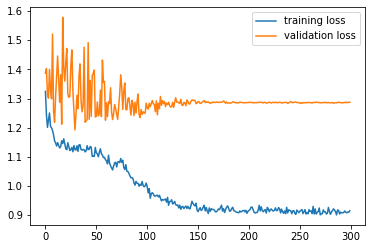

In [18]:
import matplotlib.pyplot as plt

plt.plot(list(range(len(tracker.training_loss))), tracker.training_loss, label="training loss")
plt.plot(list(range(len(tracker.training_loss))), tracker.validation_loss, label="validation loss")
plt.legend()

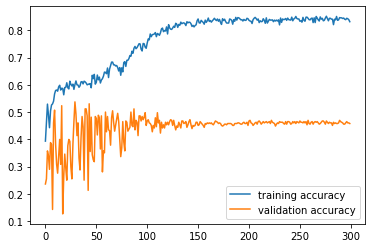

In [20]:
import matplotlib.pyplot as plt

plt.plot(list(range(len(tracker.training_accuracy))), tracker.training_accuracy, label="training accuracy")
plt.plot(list(range(len(tracker.validation_accuracy))), tracker.validation_accuracy, label="validation accuracy")
plt.legend()

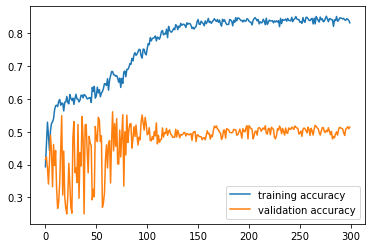

In [21]:
import matplotlib.pyplot as plt

plt.plot(list(range(len(tracker.training_accuracy))), tracker.training_uar, label="training accuracy")
plt.plot(list(range(len(tracker.validation_accuracy))), tracker.validation_uar, label="validation accuracy")
plt.legend()

In [22]:
import pickle

with open('log/log_20220418_105236_acrnn_locked_dropout.pkl', 'rb') as f:
    tracker = pickle.load(f)


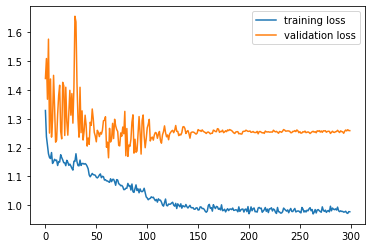

In [23]:
import matplotlib.pyplot as plt

plt.plot(list(range(len(tracker.training_loss))), tracker.training_loss, label="training loss")
plt.plot(list(range(len(tracker.training_loss))), tracker.validation_loss, label="validation loss")
plt.legend()

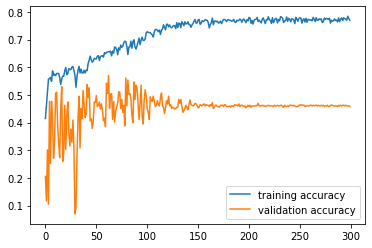

In [24]:
import matplotlib.pyplot as plt

plt.plot(list(range(len(tracker.training_accuracy))), tracker.training_accuracy, label="training accuracy")
plt.plot(list(range(len(tracker.validation_accuracy))), tracker.validation_accuracy, label="validation accuracy")
plt.legend()

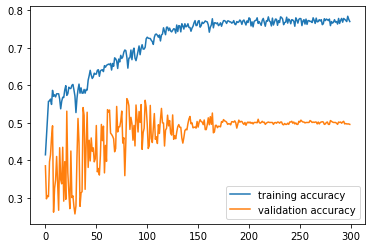

In [25]:
import matplotlib.pyplot as plt

plt.plot(list(range(len(tracker.training_accuracy))), tracker.training_uar, label="training accuracy")
plt.plot(list(range(len(tracker.validation_accuracy))), tracker.validation_uar, label="validation accuracy")
plt.legend()